In [1]:
from IPython.display import Image, display
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import os
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U ultralytics

   ---------------------------------------- 0.0/904.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.3 kB ? eta -:--:--
   ----------------------- ---------------- 524.3/904.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 904.3/904.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.48
    Uninstalling ultralytics-8.3.48:
      Successfully uninstalled ultralytics-8.3.48


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:03<00:00, 6.34MB/s]


In [7]:
dataset_yaml = """
names:
- elbow positive
- fingers positive
- forearm fracture
- humerus
- humerus fracture
- shoulder fracture
- wrist positive

nc: 7

train: Bone-Fracture-Detection-3/train/images
val: Bone-Fracture-Detection-3/valid/images
test: Bone-Fracture-Detection-3/test/images
"""
with open("data.yaml", "w") as f:
    f.write(dataset_yaml)

In [ ]:
model.train(data="D:\\PROJECTS\\Bone Fracture Detection\Dataset\\bone fracture detection.v4-v4.yolov8\\data.yaml", epochs=100, batch=16, imgsz=416, amp=True)

Ultralytics 8.3.55  Python-3.8.20 torch-2.4.1 CPU (12th Gen Intel Core(TM) i5-12500H)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:\PROJECTS\Bone Fracture Detection\Dataset\bone fracture detection.v4-v4.yolov8\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 755k/755k [00:00<00:00, 2.38MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     


  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512,

train: Scanning D:\PROJECTS\Bone Fracture Detection\Dataset\bone fracture detection.v4-v4.yolov8\train\labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:02<00:00, 1303.17it/s]


train: New cache created: D:\PROJECTS\Bone Fracture Detection\Dataset\bone fracture detection.v4-v4.yolov8\train\labels.cache


val: Scanning D:\PROJECTS\Bone Fracture Detection\Dataset\bone fracture detection.v4-v4.yolov8\valid\labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 1223.89it/s]

val: New cache created: D:\PROJECTS\Bone Fracture Detection\Dataset\bone fracture detection.v4-v4.yolov8\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.575      13.34      2.798         18        416:  11%|█         | 24/227 [01:34<14:12,  4.20s/it]

In [ ]:
metrics = model.val()

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/Bone-Fracture-Detection-3/valid/labels.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.14it/s]


                   all        131        157      0.406      0.261      0.281      0.102
        elbow positive         18         19      0.198      0.105       0.11     0.0404
      fingers positive         33         39       0.29      0.128      0.141     0.0682
      forearm fracture         28         32      0.637      0.625      0.588      0.263
               humerus         24         29       0.72      0.517      0.572       0.18
     shoulder fracture         15         16      0.589      0.188      0.253     0.0538
        wrist positive         13         22          0          0     0.0197    0.00518
Speed: 0.5ms preprocess, 10.2ms inference, 0.1ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train42


In [ ]:
results = model.predict(source='/content/Bone-Fracture-Detection-3/test/images', save=True)


image 1/59 /content/Bone-Fracture-Detection-3/test/images/distal-humerus-fracture-1_jpg.rf.1f3d413ea8e8f762d70c0b446841db9c.jpg: 416x416 (no detections), 10.7ms
image 2/59 /content/Bone-Fracture-Detection-3/test/images/image1_1015_png_jpg.rf.a04624f13585b3897392f845ceb1c0fe.jpg: 416x416 (no detections), 10.1ms
image 3/59 /content/Bone-Fracture-Detection-3/test/images/image1_1035_png_jpg.rf.48132cdd19944232f8527c850e27ad6c.jpg: 416x416 2 humeruss, 10.1ms
image 4/59 /content/Bone-Fracture-Detection-3/test/images/image1_1044_png_jpg.rf.36f03f73f53ee5473ba7097082f3404c.jpg: 416x416 1 fingers positive, 10.1ms
image 5/59 /content/Bone-Fracture-Detection-3/test/images/image1_1126_png_jpg.rf.ef2f773fde0f74728263dedc2922daf7.jpg: 416x416 1 forearm fracture, 10.1ms
image 6/59 /content/Bone-Fracture-Detection-3/test/images/image1_1175_png_jpg.rf.a43bd26da636ba5ec96d1e04524bdb3c.jpg: 416x416 1 humerus, 10.1ms
image 7/59 /content/Bone-Fracture-Detection-3/test/images/image1_1233_png_jpg.rf.d5ca002

In [ ]:
model.save('/content/drive/MyDrive/best_bone_fracture_model.pt')

In [7]:
model = YOLO('/content/drive/MyDrive/best_bone_fracture_model.pt')

In [10]:
results = model.predict(source='/content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images', save=True, conf=0.25)
predicted_images = glob.glob('runs/predict/*.jpg')

for img_path in predicted_images:
    display(Image(filename=img_path))


image 1/169 /content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 (no detections), 43.1ms
image 2/169 /content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images/image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg: 480x640 2 fingers positives, 151.8ms
image 3/169 /content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images/image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg: 544x640 1 humerus, 1 shoulder fracture, 44.4ms
image 4/169 /content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images/image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg: 544x640 1 shoulder fracture, 15.7ms
image 5/169 /content/drive/MyDrive/archive (4)/bone fracture detection.v4-v4.yolov8/test/images/image1_1015_png.rf.9181f8eb07451331e22381bacb3a5bd2.jpg: 640x640 (no detections), 17.7ms
image 6/169 /content/drive/MyDrive/arch

In [11]:
results = model.val(data="/content/drive/MyDrive/archive (4)/BoneFractureYolo8/data.yaml")

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


100%|██████████| 755k/755k [00:00<00:00, 38.0MB/s]
val: Scanning /content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.48it/s]


                   all        348        204      0.369      0.124      0.112     0.0398
        elbow positive         28         29      0.107      0.069       0.04    0.00898
      fingers positive         41         48      0.188     0.0833     0.0521     0.0144
      forearm fracture         37         43      0.666      0.442      0.431      0.174
      humerus fracture         31         36          1          0          0          0
     shoulder fracture         19         20      0.255       0.15      0.128     0.0336
        wrist positive         17         28          0          0     0.0208     0.0077
Speed: 2.4ms preprocess, 9.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val


In [12]:
print("Precision:", results.box.p[0])
print("Recall:", results.box.r[0])
print("F1 Score:", results.box.f1[0])
print("mAP50:", results.maps[0])
print("mAP50-95:", results.maps[1])

Precision: 0.10668209615144685
Recall: 0.06896551724137931
F1 Score: 0.08377439122983929
mAP50: 0.00897860554640582
mAP50-95: 0.014400453107949221



image 1/1 /content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/images/image1_179_png.rf.2dac77668440f0f798140d3233888a64.jpg: 256x640 (no detections), 41.2ms
Speed: 2.1ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

image 1/1 /content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/images/image1_1061_png.rf.fbf0e5b8dba2be5aa26bd71df6622c36.jpg: 480x640 (no detections), 27.4ms
Speed: 3.1ms preprocess, 27.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/images/image1_1219_png.rf.29d7e993924eceda219d0666c7a24c99.jpg: 640x288 1 fingers positive, 38.1ms
Speed: 2.1ms preprocess, 38.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 288)

image 1/1 /content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/images/image1_7108_png.rf.a500619ae213e7d7abde9bedc812458f.jpg: 608x640 1 shoulder fracture, 59.4ms
Speed: 4.1ms preprocess, 59.4ms inferen

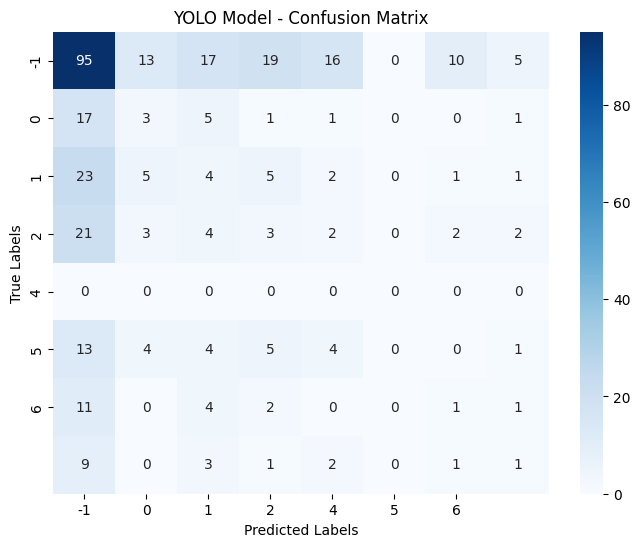

In [15]:
val_image_paths = "/content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/images"
val_true_labels = "/content/drive/MyDrive/archive (4)/BoneFractureYolo8/valid/labels"

true_labels = []
pred_labels = []

image_files = glob.glob(os.path.join(val_image_paths, "*.jpg"))
label_files = glob.glob(os.path.join(val_true_labels, "*.txt"))

for img_path, label_path in zip(image_files, label_files):
    prediction = model.predict(source=img_path)

    pred_label = prediction[0].boxes.cls[0].item() if len(prediction[0].boxes) > 0 else -1

    with open(label_path, 'r') as f:
        lines = f.readlines()
        true_label = int(lines[0].split()[0]) if lines else -1

    true_labels.append(true_label)
    pred_labels.append(pred_label)

conf_matrix = confusion_matrix(true_labels, pred_labels)
accuracy = accuracy_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels, average="weighted")
f2 = fbeta_score(true_labels, pred_labels, beta=2, average="weighted")

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("F2 Score:", f2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('YOLO Model - Confusion Matrix')
plt.show()